## テスト

In [1]:
import math
import numpy as np
import time

t_start = time.time()

#外周の半径を定義
r = int(input("外径の半径を入力(mm)"))
r_i  = int(input("内径の半径を入力(mm)"))
r_h = int(input("光を受け取る位置を入力(mm)(外径の半径よりも大きくすること)"))
tes = r

def array(xlist,ylist):
    keep_x = []
    keep_y = []
    keep_x = [i*-1 for i in xlist[::-1]]
    keep_y = [i for i in ylist[::-1]]

    return xlist + keep_x,ylist + keep_y

#解の公式
def quadratic_formula(a,b,r,x,grad):
    if a==1 or a==-1:
#         print("解の公式が適応できません")
        return 0
    else:
        global tes
        if grad<0:   
            #判別式で直線と交わっているか確かめる
            D = pow(a,2)*pow(b,2)-(1+pow(a,2))*(pow(b,2)-pow(r,2))
            if D<0:
    #             print("光線が内周の円と交わっていません")
                #内周と接さずに外周と接する
    #             print("tes",tes)
                if x<0:
                    return (-a*b+np.sqrt(pow(a,2)*pow(b,2)-(1+pow(a,2))*(pow(b,2)-pow(tes,2))))/(1+pow(a,2))
                elif x==0:
                    return x
                elif x>0:
                    return (-a*b-np.sqrt(pow(a,2)*pow(b,2)-(1+pow(a,2))*(pow(b,2)-pow(tes,2))))/(1+pow(a,2))
            elif D == 0:
                print("直線と円が接しています")
            else:
                if x<0:
                    return (-a*b+np.sqrt(pow(a,2)*pow(b,2)-(1+pow(a,2))*(pow(b,2)-pow(r,2))))/(1+pow(a,2))
                elif x==0:
                    return x
                elif x>0:
                    return (-a*b-np.sqrt(pow(a,2)*pow(b,2)-(1+pow(a,2))*(pow(b,2)-pow(r,2))))/(1+pow(a,2))
        else:
            #判別式で直線と交わっているか確かめる
            D = pow(a,2)*pow(b,2)-(1+pow(a,2))*(pow(b,2)-pow(r,2))
            if D<0:
    #             print("光線が内周の円と交わっていません")
                #内周と接さずに外周と接する
    #             print("tes",tes)
                if x<0:
                    return (-a*b-np.sqrt(pow(a,2)*pow(b,2)-(1+pow(a,2))*(pow(b,2)-pow(tes,2))))/(1+pow(a,2))
                elif x==0:
                    return x
                elif x>0:
                    return (-a*b+np.sqrt(pow(a,2)*pow(b,2)-(1+pow(a,2))*(pow(b,2)-pow(tes,2))))/(1+pow(a,2))
            elif D == 0:
                print("直線と円が接しています")
            else:
                if x<0:
                    return (-a*b-np.sqrt(pow(a,2)*pow(b,2)-(1+pow(a,2))*(pow(b,2)-pow(r,2))))/(1+pow(a,2))
                elif x==0:
                    return x
                elif x>0:
                    return (-a*b+np.sqrt(pow(a,2)*pow(b,2)-(1+pow(a,2))*(pow(b,2)-pow(r,2))))/(1+pow(a,2))            
            

            
#直線の傾き
def katamuki(n_i ,n_r ,x_i,y_i,sita_h_i,sita_r_i,sita_i,sin_i):
    if n_i>n_r:
        sin_c = n_r/n_i
        sita_c = np.arcsin(sin_c)
        if sita_c > sita_i:
            #屈折しつつ透過
            #屈折角を求める
            sin_r = n_i*sin_i/n_r
            sita_r = np.arcsin(sin_r)
            #同じものでよさそう
            if x_i<0:
                if y_i>0:
                    gradient_i = np.tan(-(sita_h_i+sita_r))
                    return gradient_i
                if y_i<0:
                    gradient_i = np.tan(-(np.radians(180)-(sita_h_i+sita_r)))
                    #print("テストgrad",gradient_i)
                    
                    return gradient_i
            elif x_i ==0:
                print("x_i=0")
            elif x_i>0:
                if y_i>0:
                    gradient_i = np.tan(-(np.radians(180)-(sita_h_i+sita_r)))
                    return gradient_i
                if y_i<0:
                    gradient_i = np.tan(-(sita_h_i+sita_r))
                    return gradient_i
            
        else:
            #全反射
            sita_r = sita_i
            
            if x_i<0:
                gradient_i = np.tan(-(np.radians(180)-(sita_r-sita_h_i)))
                return gradient_i
            elif x_i==0:
                print("おそらく存在しない")
            elif x_i>0:
                gradient_i = np.tan(-(sita_r-sita_h_i))
                return gradient_i
    else:
        if x_i<0:
            if y_i>0:
                gradient_i = np.tan(-(sita_h_i+sita_r_i))
                return gradient_i
            if y_i<0:
                gradient_i = np.tan(-(np.radians(180)-(sita_h_i+sita_r_i)))
                return gradient_i
        elif x_i ==0:
            print("x_i=0")
        elif x_i>0:
            if y_i>0:
                gradient_i = np.tan(-(np.radians(180)-(sita_h_i+sita_r_i)))
                return gradient_i
            if y_i<0:
                gradient_i = np.tan(-(sita_h_i+sita_r_i))
                return gradient_i

            
#角計測部分
#全反射0 その他１
def calculate_angle_and_(n_i ,n_r ,x ,y ,x_i ,y_i, r_i,change):
    #求めたい角度に必要な2つの直線
    #1.y軸に平行な直線の式はx=h → 0*y+1*x-h=0
    a = -(y_i - y)
    b = x_i - x
    #2.接線に垂直な直線→便利な公式：ax+by+c=0 に垂直で，(x0,y0) を通る直線の方程式は，b(x−x0)−a(y−y0)=0
    c = y_i
    d = -x_i
    if a*c + b*d == 0:
#         print("a*c + b*d",a*c + b*d)
        return 0,0,0,0,0
    #2直線の成す角→入射角
    tan = (abs(a*d - b*c))/(abs(a*c + b*d))
    sita_i = np.arctan(tan)
    #スネルの法則にひつような入射角のsin
    sin_i = np.sin(sita_i)
    
    
    a_h = 0
    b_h = 1
    if a_h*c + b_h*d == 0:
#         print("a*c + b*d",a*c + b*d)
        return 0,0 ,0,0,0 
    tan2 = (abs(a_h*d - b_h*c))/(abs(a_h*c + b_h*d))
    sita_h_i = np.arctan(tan2)
    sin_h_i = np.sin(sita_h_i)
#     print("n_i",n_i)
#     print("n_r",n_r)
#     print("sin_i",sin_i)
    if change == 0:
        sita_r = sita_i
#         print("calcの中、全反射だよ")
    else:
        sin_r = n_i*sin_i/n_r
        if sin_r > 1:
#             print("sinが1を超えてる")
            return 0,0,0,0,0
        sita_r = np.arcsin(sin_r)
    

    gradient_i = katamuki(n_i ,n_r ,x_i,y_i,sita_h_i,sita_r,sita_i,sin_i) 
#     print("gradient_i",gradient_i)
    if gradient_i == None:
#         print("てすと")
        return 0,0,0
    y_intercept_i = y_i - gradient_i * x_i
    x_i_i = quadratic_formula(gradient_i,y_intercept_i,r_i,x_i,gradient_i)
    y_i_i = gradient_i*x_i_i + y_intercept_i
    #角度追加
    if x_i_i < 0:
        beta = sita_r + sita_h_i
    else:
        beta = np.pi - (sita_r + sita_h_i)
    return x_i_i ,y_i_i ,beta ,gradient_i, y_intercept_i


    

xlist = []
ylist = []
xlist_d = []
ylist_d = []
xlist_z = []
ylist_z = []
x_a_list = []
y_a_list = []
x_d_list = []
y_d_list = []
test_x = []
test_y = []
sita_v_list = []
gradient_list = []
intercept_list = []
gradient_half_list = []
intercept_half_list = []

cnt=0
arg = 100000


# for x in range(-r+1,r):
for x in range(-r+1,0):
    if x == 0:
        continue
#     print("x",x)
    #最初
    y = 0
    x_i = x
    y_i = np.sqrt(pow(r,2)-pow(x_i,2))
    
    n_i = 1.000292
    n_r = 1.49
    #2つ目の座標
    #ここで内径に接しない場合も考える必要がある。
    x_i_i, y_i_i,beta,g_empty,i_empty = calculate_angle_and_(n_i ,n_r ,x ,y ,x_i ,y_i, r_i,1)
#     x_d_list.append(x_i_i)
#     y_d_list.append(y_i_i)
#     new_x_d_list,new_y_d_list = array(x_d_list, y_d_list)
#     print("1回目のcalc")
    if x_i_i == 0 and y_i_i == 0:
#         print("--------------------------------------")
        cnt +=1
        continue    
    if pow(x_i_i,2)+pow(y_i_i,2) > pow(r-1,2):
#         print("-------------------------------------")
#         print("D<0ルート")          
        n_i = 1.49
        n_r = 1.000292
        cnt +=1
        x_d_get,y_d_get,beta,gradient,intercept = calculate_angle_and_(n_i ,n_r ,x_i ,y_i ,x_i_i ,y_i_i, r_h,1)
        a = -(y_d_get - y_i_i)
        b = x_d_get - x_i_i
        c = 1
        d = 0    
        tan = (abs(a*d - b*c))/(abs(a*c + b*d))
#         alfa = abs(np.arccos(x_d_get/r_h) - np.pi)
#         slit = abs(np.rad2deg(alfa)-np.rad2deg(beta))
#         if arg < slit:
#             continue
        if 0<=y_d_get:
#             print("-------------------------------------")
            continue
        sita_v = np.arctan(tan)
        sita_v_list.append(sita_v)
        x_d_list.append(x_i_i)
        y_d_list.append(y_i_i)
        test_x.append(x_i)
        test_y.append(y_i)
        new_x_d_list,new_y_d_list = array(x_d_list, y_d_list)
        
        #外周の座標点
        x_a_list.append(x_i_i)
        y_a_list.append(y_i_i)
        new_x_a_list,new_y_a_list = array(x_a_list,y_a_list)
        #最後の傾きと切片
        gradient_half_list.append(gradient)
        intercept_half_list.append(intercept)
        gradient_list, intercept_list = array(gradient_half_list,intercept_half_list)        
        
#         xlist_d.append(x_d_get)
#         ylist_d.append(y_d_get)
#         new_xlist_d,new_ylist_d = array(xlist_d, ylist_d)
#         xlist.append(x_d_get)
#         ylist.append(y_d_get)
#         print("-------------------------------------")
    else:
        #内側→外
#         print("D>0ルート")
        n_i = 1.49
        n_r = 1.000292
        sin_c = n_r/n_i
        sita_c = np.arcsin(sin_c)    
        a = -(y_i_i - y_i)
        b = x_i_i - x_i
        c = y_i_i
        d = -x_i_i

        tan = (abs(a*d - b*c))/(abs(a*c + b*d))
        sita_i = np.arctan(tan)
        #3つ目の座標 透過or全反射→どう分けよう とりあえずaをトリガーにする？→aと半径をトリガーにする？
        #ここのrが問題→全反射と内部を透過する場合で代入しなければならない半径が異なる
        if sita_c > sita_i:
            x_i_i_i, y_i_i_i,beta,g_empty,i_empty = calculate_angle_and_(n_i ,n_r ,x_i ,y_i ,x_i_i ,y_i_i, r_i,1)
#             print("2回目のcalc　内部")
            if x_i_i_i == 0 and y_i_i_i == 0:
#                 print("--------------------------------------")
                cnt +=1
                continue
            n_i = 1.000292
            n_r = 1.49 
            #外周の座標
            x_i_i_r, y_i_i_r,beta,g_empty,i_empty = calculate_angle_and_(n_i ,n_r ,x_i_i ,y_i_i ,x_i_i_i ,y_i_i_i, r,1)
#             print("3回目のcalc")
            if x_i_i_r == 0 and y_i_i_r == 0:
#                 print("--------------------------------------")
#                 cnt +=1
                continue
            n_i = 1.49
            n_r = 1.000292
            x_get,y_get,beta,gradient,intercept = calculate_angle_and_(n_i ,n_r ,x_i_i_i ,y_i_i_i ,x_i_i_r ,y_i_i_r, r_h,1)
            alfa = abs(np.arccos(x_get/r_h) - np.pi)
            slit = abs(np.rad2deg(alfa)-np.rad2deg(beta))
            if arg < slit:
                continue
#             print("最後のcalc　内部透過")
#             print("--------------------------------------")
        elif sita_c < sita_i:      
#             print("全反射ルート")
            #外周の座標
            x_i_i_r, y_i_i_r,beta,g_empty,i_empty = calculate_angle_and_(n_i ,n_r ,x_i ,y_i ,x_i_i ,y_i_i, r,0)
#             print("2回目のcalc 全反射")
            if x_i_i_r == 0 and y_i_i_r == 0:
#                 print("--------------------------------------")
                cnt +=1
                continue
            x_get,y_get,beta,gradient,intercept = calculate_angle_and_(n_i ,n_r ,x_i_i ,y_i_i ,x_i_i_r ,y_i_i_r, r_h,1)
            alfa = abs(np.arccos(x_get/r_h) - np.pi)
            slit = abs(np.rad2deg(alfa)-np.rad2deg(beta))
#             print("slitの中身",slit)
            if arg < slit:
                continue
#             print("最後のcalc　全反射")
#             print("--------------------------------------")
            if 0<=y_get:
                continue
            xlist_z.append(x_get)
            ylist_z.append(y_get)
            
            new_xlist_z,new_ylist_z = array(xlist_z,ylist_z)
        if 0<=y_get:
            continue
            
        #外周の座標点
        x_a_list.append(x_i_i_r)
        y_a_list.append(y_i_i_r)
        new_x_a_list,new_y_a_list = array(x_a_list,y_a_list)
        #最後の傾きと切片
        gradient_half_list.append(gradient)
        intercept_half_list.append(intercept)
        gradient_list, intercept_list = array(gradient_half_list,intercept_half_list)
        
#         xlist.append(x_get)
#         ylist.append(y_get)
#         new_xlist, new_ylist = array(xlist,ylist)

t_end = time.time()
elapsed_time = t_end-t_start
print(f"経過時間：{elapsed_time/60}分")

外径の半径を入力(mm) 50000
内径の半径を入力(mm) 25000
光を受け取る位置を入力(mm)(外径の半径よりも大きくすること) 60000


経過時間：-1429.4814581871033


In [65]:
#透過角 を求めるための回転装置をもしたシミュレーション
#90度だけで良さそう
#全ての直線データをぶちこむ
#外周座標は最後の透過角を求めるために必要。
# import time

def light_receiving(gradient ,intercept, x_k, y_k, distance1, distance2, slit1, slit2):
    #print("値が入ってるか？",gradient[0],intercept[0],x_k[0],y_k[0],distance1,distance2)
    t1 = time.time() 
    
    #まずslitの位置を定義 下準備
    #円管とスリットの距離の定義が必要
#     distance1 = 1
#     distance2 = 1
    i = 0
    x1y1 = np.zeros((900,2))
    x2y2 = np.zeros((900,2))
    s_sita = np.zeros(1801)
    for sita in [tmp*0.1 for tmp in range(1800, 2700)]:
        x1 = distance1*np.cos(np.deg2rad(sita))
        y1 = distance1*np.sin(np.deg2rad(sita))
        x2 = distance2*np.cos(np.deg2rad(sita))
        y2 = distance2*np.sin(np.deg2rad(sita))
        similar_sita = abs(np.arctan(np.tan(abs(x1)/abs(y1))))
        x1y1[i][0] = x1
        x1y1[i][1] = y1
        x2y2[i][0] = x2
        x2y2[i][1] = y2
        s_sita[i] = similar_sita
        i += 1
        
    # 経過時間を表示
    t2 = time.time()
    elapsed_time_1 = t2-t1
    print(f"経過時間：{elapsed_time_1}","秒")
    print("---------------下準備終了！------------------")
    
    t3 = time.time() 
    #スリット幅を入力
    #need to change
#     slit1 = 1
#     slit2 = 1
    #ある角度における光線の本数カウント用
    count_light = [0] * 900
    count_x = [0] * 900
    count_y = [0] * 900
    t_angle = [0] * 900
    
    cnt_slit1 = 0
    cnt_slit2 = 0
    
    for g, i, xk, yk in zip(gradient, intercept, x_k, y_k):
        for j in range(900): #90度分の回転を表す
            #スリットの傾きと,光線の交点
            a = -np.tan(s_sita[j])
            b = x1y1[j][1] - a*x1y1[j][0]
            x = (i - b)/(a - g)
            #スリット幅(斜めver)
            s_d = slit1*np.cos(abs(s_sita[j]))/2
            #1つ目のスリットを超えられるかどうか
            if x < x1y1[j][0] + s_d and x1y1[j][0] - s_d < x:
                #2つめの条件に変更
                b = x2y2[j][1] - a*x2y2[j][0]
                x = (i - b)/(a - g)
                s_d = slit2*np.cos(abs(s_sita[j]))/2
                cnt_slit1 += 1
                #2つ目のスリットを超えられるかどうか
                if x < x2y2[j][0] + s_d and x2y2[j][0] - s_d < x:
                    cnt_slit2 += 1
                    #光の本数をカウント
                    count_light[j] += 1
                    #透過角算出用のx,yもおいておきたい→平均orとりあえずmin,maxの2つをキープしておいて考える。
                    #怪しい、場合によってはmaxminが大幅に離れてる？→ここはどのへんに値が偏っているのかを見てもいいかも一旦保留
                    count_x[j] += xk
                    count_y[j] += yk
    
    # 経過時間を表示
    t4 = time.time()
    elapsed_time_2 = t4-t3
    print(f"経過時間：{elapsed_time_2}","秒")
    print("---------------光線の処理完了！------------------")
    print("スリット1枚目を超えられた本数",cnt_slit1)
    print("スリット2枚目を超えられた本数",cnt_slit2)
    #print("光線の本数は？",sum(count_light))
    
    t5 = time.time()
    #jごとの透過角を求める必要がある(横軸)
    for j in range(900):
        #ある角度jのときのスリットを透過する外周の点の平均
        if count_light[j] == 0:
            continue
        x_g = count_x[j]/count_light[j]
        y_g = count_y[j]/count_light[j]
        x_slit2 = x2y2[j][0]
        y_slit2 = x2y2[j][1]
        a = y_slit2 - y_g
        b = x_g - x_slit2
        c = 1
        d = 0
        t_angle[j] = np.rad2deg(np.arctan(np.tan(abs(a*d - b*c)/abs(a*c + b*d))))
        
    # 経過時間を表示
    t6 = time.time()
    elapsed_time_3 = t6-t5
    print(f"経過時間：{elapsed_time_3}","秒")
    print("---------------透過角算出！------------------")
    
    print("総実行時間:",(elapsed_time_1+elapsed_time_2+elapsed_time_3)/60,"分")
    
    
    return count_light, t_angle 

In [66]:
# d1 = int(input("スリット一枚目(mm)(外径の半径よりも大きくすること)"))
#1mm → 10000  0.2mm → 2000 0.05mm → 500
d1 = r*1.1
d2 = d1*1.1
#スリット幅
s1 = 2000
s2 = 500

経過時間：0.029105186462402344 秒
---------------下準備終了！------------------
経過時間：593.4781119823456 秒
---------------光線の処理完了！------------------
スリット1枚目を超えられた本数 1058076
スリット2枚目を超えられた本数 55260
経過時間：0.002514362335205078 秒
---------------透過角算出！------------------
総実行時間: 9.891828858852387 分


<BarContainer object of 900 artists>

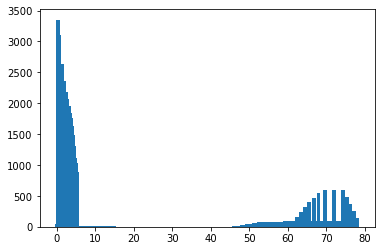

In [67]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

light_num, toka_angle = light_receiving(gradient_list ,intercept_list, new_x_a_list, new_y_a_list, d1, d2,s1 ,s2)

plt.bar(toka_angle, light_num, width=1.0) 

In [70]:
print(sum(light_num),sum(toka_angle))

55260 5884.955225959639


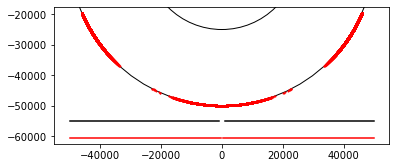

In [71]:
g = plt.subplot()
#外径
draw_circle_r = plt.Circle((0, 0), r, fill=False)
#内径
draw_circle_i = plt.Circle((0, 0), r_i, fill=False)
g.add_artist(draw_circle_r)
g.add_artist(draw_circle_i)
g.plot(new_x_a_list,new_y_a_list, marker="o", color = "red", linestyle = " ",markersize=1)
# g.plot(test_x,test_y, marker="o", color = "red", linestyle = " ",markersize=1)
# g.plot([new_x_d_list[1000],test_x[1000]],[new_y_d_list[1000],test_y[1000]])
# g.plot(new_xlist_d, new_ylist_d, marker="o", color = "red", linestyle = " ",markersize=1)
# g.plot([new_x_a_list[1000],new_y_a_list[1000]],[new_ylist_d[1000],new_y_d_list[1000]])
#g.plot([-s1/2,-d2],[-r,-d2])
g.plot([s1/2,r],[-d1,-d1], color = "black")
g.plot([-s1/2,-r],[-d1,-d1],color = "black")
g.plot([s2/2,r],[-d2,-d2],color = "red")
g.plot([-s2/2,-r],[-d2,-d2],color = "red")
g.set_aspect('equal')